In [32]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

In [5]:
#Importo el documento limpiado 
df = pd.read_csv("input/sharkattack_clean.csv", encoding = 'latin-1')
df

,Unnamed: 0,Country,Activity,Year
0,2,USA,Surfing,2018
1,12,USA,Swimming,2018
2,53,USA,Surfing,2017
3,54,USA,Surfing,2017
4,61,USA,Surfing,2017
...,...,...,...,...
813,6151,USA,Swimming,1751
814,6187,USA,Swimming,2009
815,6201,USA,Surfing,1994
816,6288,USA,Swimming,1916


In [7]:
#para facilitar la visualización de datos añado una columna llamada siglo
df["Siglo"] = pd.cut(df.Year,4,labels=range(1700,2100,100))

df

,Unnamed: 0,Country,Activity,Year,Siglo
0,2,USA,Surfing,2018,2000
1,12,USA,Swimming,2018,2000
2,53,USA,Surfing,2017,2000
3,54,USA,Surfing,2017,2000
4,61,USA,Surfing,2017,2000
...,...,...,...,...,...
813,6151,USA,Swimming,1751,1700
814,6187,USA,Swimming,2009,2000
815,6201,USA,Surfing,1994,2000
816,6288,USA,Swimming,1916,1900


In [8]:
pd.cut(df.Year,4,labels=range(1700,2100,100)).value_counts()

2000    740
1900     57
1800     16
1700      5
Name: Year, dtype: int64

In [23]:
#Cambio los siglos a string para su posterior cambio a siglas romanas
df['Siglo'] = df['Siglo'].astype(str)
        

In [25]:
#reemplazo siglos.
df["Siglo"][df["Siglo"].str.startswith("20")] = "XXI"
df["Siglo"][df["Siglo"].str.startswith("19")] = "XX"
df["Siglo"][df["Siglo"].str.startswith("18")] = "XIX"
df["Siglo"][df["Siglo"].str.startswith("17")] = "XVIII"
df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,Unnamed: 0,Country,Activity,Year,Siglo
0,2,USA,Surfing,2018,XXI
1,12,USA,Swimming,2018,XXI
2,53,USA,Surfing,2017,XXI
3,54,USA,Surfing,2017,XXI
4,61,USA,Surfing,2017,XXI
...,...,...,...,...,...
813,6151,USA,Swimming,1751,XVIII
814,6187,USA,Swimming,2009,XXI
815,6201,USA,Surfing,1994,XXI
816,6288,USA,Swimming,1916,XX


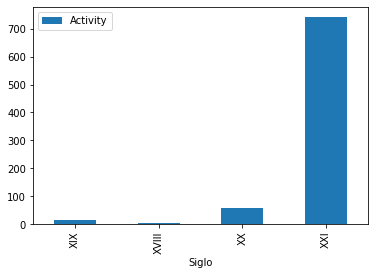

In [26]:
#compruebo cuantos ataques ha habido por siglo
%matplotlib inline
df.groupby("Siglo").agg({"Activity":"count"}).plot.bar()

In [27]:
#compruebo cuantos ataques ha habido tanto de "Surfing" comod e "Swimming"
df.Activity.value_counts()

Surfing     522
Swimming    296
Name: Activity, dtype: int64

In [28]:
#Agrupo los ataques por siglo y por actividad y cuento cuantos ataques ha habido
df.groupby(["Siglo","Activity"]).agg({"Activity":"count"})

Activity
Siglo Activity          
XIX   Surfing          1
      Swimming        15
XVIII Surfing          1
      Swimming         4
XX    Swimming        57
XXI   Surfing        520
      Swimming       220

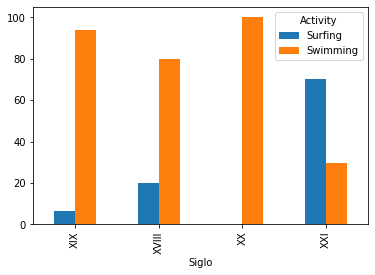

In [31]:
df.groupby(["Siglo","Activity"]).size().groupby(level=0).apply(
    lambda x:100 * x /x.sum()
).unstack().plot(kind ='bar',stacked= False)

    
